In [1]:
import pandas as pd

In [6]:
listings = pd.read_csv("./data/airbnb/listings.csv")

In [7]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46095,-0.11758,Entire home/apt,99,2,193,2018-04-29,1.63,3,290
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,65,1,21,2011-09-13,0.17,2,365
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,10,89,2019-08-10,0.81,1,319
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,307,4,43,2019-11-02,0.36,15,218
4,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364


**Task:** Estimate price of room rental based on room properties.

In [8]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.336400e+04,7.336400e+04,0.0,73364.000000,73364.000000,73364.000000,73364.000000,73364.000000,50786.000000,73364.000000,73364.000000
mean,2.728494e+07,1.050959e+08,NaN,51.509863,-0.128646,129.392386,5.825214,14.626465,0.632481,28.106128,115.853648
std,1.440012e+07,1.114664e+08,NaN,0.047742,0.095956,306.017740,26.320069,34.773806,1.165870,111.625202,140.539158
min,1.155100e+04,2.010000e+03,NaN,51.296850,-0.496160,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.575397e+07,1.757784e+07,NaN,51.484330,-0.188410,45.000000,1.000000,0.000000,0.090000,1.000000,0.000000
50%,2.724552e+07,5.394886e+07,NaN,51.513990,-0.126230,79.000000,2.000000,3.000000,0.290000,1.000000,38.000000
75%,3.996368e+07,1.679681e+08,NaN,51.539470,-0.069657,131.000000,4.000000,13.000000,0.790000,4.000000,231.000000
max,5.086939e+07,4.110563e+08,NaN,51.679830,0.288570,17786.000000,1125.000000,844.000000,67.000000,861.000000,365.000000


In [10]:
df = listings[['latitude', 'longitude', 'room_type', 'number_of_reviews','price']]

In [11]:
df.head()

,latitude,longitude,room_type,number_of_reviews,price
0,51.46095,-0.11758,Entire home/apt,193,99
1,51.56861,-0.11270,Private room,21,65
2,51.48780,-0.16813,Entire home/apt,89,75
3,51.52195,-0.14094,Entire home/apt,43,307
4,51.47935,-0.19743,Private room,0,150


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73364 entries, 0 to 73363
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latitude           73364 non-null  float64
 1   longitude          73364 non-null  float64
 2   room_type          73364 non-null  object 
 3   number_of_reviews  73364 non-null  int64  
 4   price              73364 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.8+ MB


In [14]:
df.head()

,latitude,longitude,room_type,number_of_reviews,price
0,51.46095,-0.11758,Entire home/apt,193,99
1,51.56861,-0.11270,Private room,21,65
2,51.48780,-0.16813,Entire home/apt,89,75
3,51.52195,-0.14094,Entire home/apt,43,307
4,51.47935,-0.19743,Private room,0,150


In [23]:
X = pd.get_dummies(df)
y = df['price']
X.drop('price', axis=1, inplace=True)

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf = RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor()

In [27]:
rf.feature_importances_

array([4.12257468e-01, 4.69572018e-01, 8.75448628e-02, 2.98506382e-02,
       4.06067298e-04, 2.03547104e-04, 1.65398748e-04])

In [28]:
import matplotlib.pyplot as plt

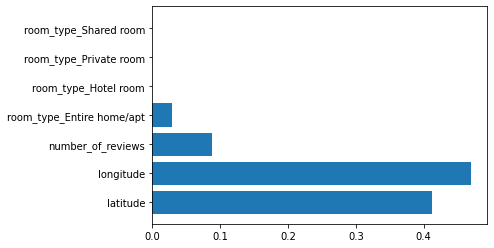

In [31]:
plt.barh(X.columns.values, rf.feature_importances_);